# Continuous Assessment

FAMILY NAME: PALACIOS GARCIA

NAME: Alejandro

STUDENT NUMBER: 73713

In [1]:
# run this cell!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
raw = pd.read_csv('fin_dat.csv', parse_dates = ['Date'], index_col = ['Date']).dropna()

### From the DataFrame "raw" Select the column INTC.O, save it in a DataFrame called "df". Explicitly save this new object as a copy. Use the `rename` function to change the column name to "price". Save the name change in the new copy of the dataframe "df".

In [3]:
# run this cell
symbol = 'INTC.O'

In [4]:
df = pd.DataFrame(raw[symbol]).copy()
df.to_csv("INTC.O")

In [5]:
# run this cell
df

,INTC.O
Date,
2010-01-04,20.88
2010-01-05,20.87
2010-01-06,20.80
2010-01-07,20.60
2010-01-08,20.83
...,...
2019-12-24,59.41
2019-12-26,59.82
2019-12-27,60.08


In [6]:
df.rename(columns = {'INTC.O' : 'price'}, inplace = True)
df.to_csv("INTC.O")

In [7]:
# run this cell
df

,price
Date,
2010-01-04,20.88
2010-01-05,20.87
2010-01-06,20.80
2010-01-07,20.60
2010-01-08,20.83
...,...
2019-12-24,59.41
2019-12-26,59.82
2019-12-27,60.08


### Using scikit-learn, divide the "df" DataFrame into 2 subsets named "train" and "test". The "train" subset should have 70% of the total data in "df" and the "test" subset must have 30% of the total data in "df". Explicitly specify that the data is not shuffled.

In [8]:
from sklearn.model_selection import (train_test_split, 
                                     KFold, 
                                     LeaveOneOut,
                                     LeavePOut, 
                                     ShuffleSplit,
                                     TimeSeriesSplit)

In [9]:
train, test = train_test_split(df, train_size = 0.7, shuffle = False )

In [10]:
# run this cell!
train.tail()

,price
Date,
2016-12-22,36.93
2016-12-23,36.97
2016-12-27,37.07
2016-12-28,36.63
2016-12-29,36.66


In [11]:
# run this cell!
test.head()

,price
Date,
2016-12-30,36.27
2017-01-03,36.60
2017-01-04,36.41
2017-01-05,36.35
2017-01-06,36.48


### Plot the column "price" of both dataframes "train" and "test" using a figure size of 10 by 6 inches.

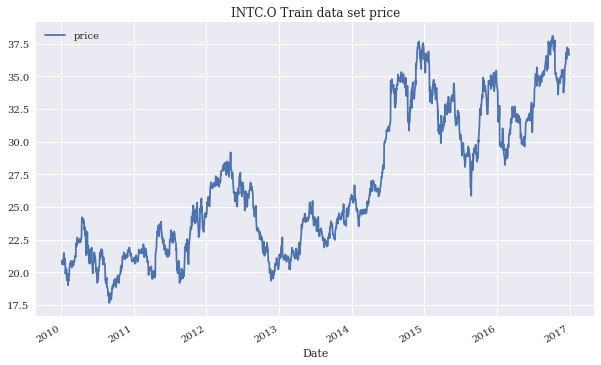

In [12]:
%matplotlib inline
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

train.plot(title = 'INTC.O Train data set price', figsize = (10, 6));

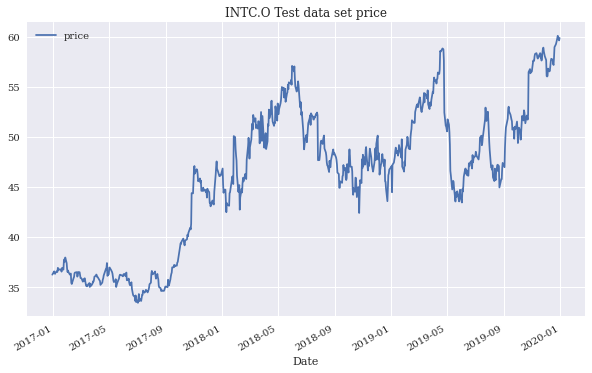

In [13]:
test.plot(title = 'INTC.O Test data set price', figsize = (10, 6));

### Calculate the log returns of the column "price" in the "train" dataset. Save the log returns as a new column in the DataFrame "train" called "returns" and drop any missing values from the dataframe.

In [14]:
# run this cell
train = train.copy()
test = test.copy()

In [15]:
train['returns'] = np.log(train['price'] / train['price'].shift(1))

In [16]:
train.dropna(inplace=True)

In [17]:
# run this cell!
train

,price,returns
Date,,
2010-01-05,20.87,-0.000479
2010-01-06,20.80,-0.003360
2010-01-07,20.60,-0.009662
2010-01-08,20.83,0.011103
2010-01-11,20.95,0.005744
...,...,...
2016-12-22,36.93,-0.001353
2016-12-23,36.97,0.001083
2016-12-27,37.07,0.002701


### Use the log returns to calculate the performance of the 'buy-and-hold' investment per USD 1 invested in the "train" dataframe. Hint: use the .cumsum() and the np.exp() functions. Save the results as a new column in the DataFrame "train" called "creturns".

In [18]:
train['creturns']=train['returns'].cumsum().apply(np.exp)

In [19]:
# run this cell!
train

,price,returns,creturns
Date,,,
2010-01-05,20.87,-0.000479,0.999521
2010-01-06,20.80,-0.003360,0.996169
2010-01-07,20.60,-0.009662,0.986590
2010-01-08,20.83,0.011103,0.997605
2010-01-11,20.95,0.005744,1.003352
...,...,...,...
2016-12-22,36.93,-0.001353,1.768678
2016-12-23,36.97,0.001083,1.770594
2016-12-27,37.07,0.002701,1.775383


### Plot the column "creturns" in the dataframe "train" using a figure size of 10 by 6 inches.

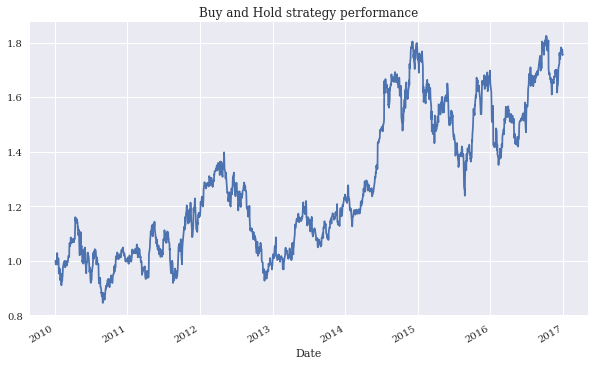

In [20]:
train['creturns'].plot(title = 'Buy and Hold strategy performance', figsize = (10, 6));

### Using the dataframe train, calculate 2 simple moving averages with windows of 20 and 180 days. Save the results in the "train" DataFrame and call them "sma_s" and "sma_l" respectively. Drop any missing values.

In [21]:
sma_s = 20
sma_l = 180

In [22]:
train['sma_s'] = train['price'].rolling(window = sma_s).mean()
train['sma_l'] = train['price'].rolling(window = sma_l).mean()

In [23]:
train.dropna(inplace=True)

In [24]:
# run this cell
train

,price,returns,creturns,sma_s,sma_l
Date,,,,,
2010-09-21,19.1400,0.011027,0.916667,18.388380,20.863061
2010-09-22,19.0100,-0.006815,0.910441,18.418630,20.852728
2010-09-23,18.9800,-0.001579,0.909004,18.443630,20.842617
2010-09-24,19.4225,0.023046,0.930196,18.505755,20.836075
2010-09-27,19.2350,-0.009701,0.921216,18.549005,20.827214
...,...,...,...,...,...
2016-12-22,36.9300,-0.001353,1.768678,35.769000,34.177667
2016-12-23,36.9700,0.001083,1.770594,35.845500,34.207111
2016-12-27,37.0700,0.002701,1.775383,35.923500,34.236056


### Plot the columns 'price', 'sma_s' and 'sma_l' of the "train" dataframe using a figure size of 10 by 6 inches.

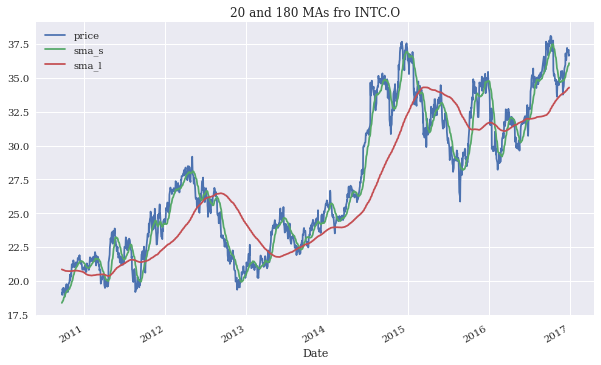

In [25]:
train[['price','sma_s','sma_l']].plot(title = '20 and 180 MAs fro INTC.O',figsize = (10, 6))
plt.show()

### Create a column called "position" in the "train" dataframe with the following trading rules:

- Go LONG (= +1) when the 20 day (shorter) sma_1 is above the 180 (longer) sma_2.

- Go SHORT (= -1) when the the 20 day (shorter) sma_1 is below the 180 (longer) sma_2.

Hint: Use the np.where() function.

In [26]:
train['position'] = np.where(train['sma_s'] > train['sma_l'], 1, -1)

In [27]:
# run this cell
train

,price,returns,creturns,sma_s,sma_l,position
Date,,,,,,
2010-09-21,19.1400,0.011027,0.916667,18.388380,20.863061,-1
2010-09-22,19.0100,-0.006815,0.910441,18.418630,20.852728,-1
2010-09-23,18.9800,-0.001579,0.909004,18.443630,20.842617,-1
2010-09-24,19.4225,0.023046,0.930196,18.505755,20.836075,-1
2010-09-27,19.2350,-0.009701,0.921216,18.549005,20.827214,-1
...,...,...,...,...,...,...
2016-12-22,36.9300,-0.001353,1.768678,35.769000,34.177667,1
2016-12-23,36.9700,0.001083,1.770594,35.845500,34.207111,1
2016-12-27,37.0700,0.002701,1.775383,35.923500,34.236056,1


### Calculate the daily returns of the strategy (based on the positions) in the dataframe "train". Save the results as a new colum in the DataFrame "train" called "strategy". Drop the missing values. Finally, calculate the performance of the Strategy per USD 1 invested. Hint: use the .cumsum() and the np.exp() functions. Save the results as a new column in the DataFrame "train" called "cstrategy".

In [28]:
train['strategy'] = train['position'].shift(1) * train['returns']

In [29]:
train.dropna(inplace=True)

In [30]:
train['cstrategy']=train['strategy'].cumsum().apply(np.exp)

In [31]:
# run this cell
train

,price,returns,creturns,sma_s,sma_l,position,strategy,cstrategy
Date,,,,,,,,
2010-09-22,19.0100,-0.006815,0.910441,18.418630,20.852728,-1,0.006815,1.006839
2010-09-23,18.9800,-0.001579,0.909004,18.443630,20.842617,-1,0.001579,1.008430
2010-09-24,19.4225,0.023046,0.930196,18.505755,20.836075,-1,-0.023046,0.985455
2010-09-27,19.2350,-0.009701,0.921216,18.549005,20.827214,-1,0.009701,0.995061
2010-09-28,19.5050,0.013939,0.934148,18.626255,20.819186,-1,-0.013939,0.981287
...,...,...,...,...,...,...,...,...
2016-12-22,36.9300,-0.001353,1.768678,35.769000,34.177667,1,-0.001353,0.806828
2016-12-23,36.9700,0.001083,1.770594,35.845500,34.207111,1,0.001083,0.807702
2016-12-27,37.0700,0.002701,1.775383,35.923500,34.236056,1,0.002701,0.809887


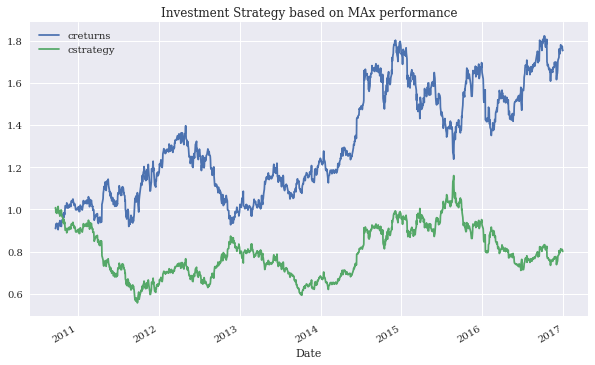

In [32]:
train[['creturns','cstrategy']].plot(title = 'Investment Strategy based on MAx performance', figsize = (10, 6));

### Open Question: Using the Financial Instrument of your choice in the DataFrame 'fin_dat.csv' and  develop and interpret the results of an investment strategy using Logistic Regression (whit a binary variable as the outcome). You can use as many relevant analyses and visual tools as possible.

In [33]:
# run this cell to the get the dataset
raw = pd.read_csv('model_data_investment_universe.csv', index_col = 0, parse_dates = True).dropna()

In [34]:
raw

,date,volume,dollar_vol,dollar_vol_1m,dollar_vol_rank,rsi,bb_high,bb_low,atr,macd,...,consumer_durables,consumer_non-durables,consumer_services,energy,finance,health_care,miscellaneous,public_utilities,technology,transportation
ticker,,,,,,,,,,,,,,,,,,,,,
AAL,2013-07-25,9851.900173,482021.770518,223614.661574,91.0,69.669475,0.011251,0.140777,-0.383445,0.681257,...,0,0,0,0,0,0,0,0,0,1
AAL,2013-07-26,7797.700026,386784.252060,234821.351626,83.0,72.045207,0.007052,0.146370,-0.412740,0.772848,...,0,0,0,0,0,0,0,0,0,1
AAL,2013-07-29,6462.699829,322916.026692,243001.954091,78.0,73.259776,0.008843,0.146963,-0.494894,0.854980,...,0,0,0,0,0,0,0,0,0,1
AAL,2013-07-30,6091.900156,303913.741002,243122.621493,79.0,72.532538,0.018500,0.142355,-0.565684,0.904814,...,0,0,0,0,0,0,0,0,0,1
AAL,2013-07-31,9571.100178,481215.006566,256336.659780,75.0,73.926238,0.016465,0.139949,-0.653399,0.954135,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTS,2014-11-28,1332.156000,58600.308107,294715.115434,90.0,71.884144,0.043559,0.157493,0.397024,2.806829,...,0,0,0,0,0,1,0,0,0,0
ZTS,2014-12-01,3153.115000,136973.841193,297525.671580,92.0,67.137279,0.051976,0.131103,0.403122,2.691178,...,0,0,0,0,0,1,0,0,0,0
ZTS,2014-12-02,2500.597000,109533.781479,298272.515355,88.0,68.612084,0.041573,0.120638,0.323857,2.615256,...,0,0,0,0,0,1,0,0,0,0


In [35]:
raw['direction'] = np.sign(raw['return_1d'])

In [36]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109675 entries, AAL to ZTS
Data columns (total 67 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   date                   109675 non-null  object 
 1   volume                 109675 non-null  float64
 2   dollar_vol             109675 non-null  float64
 3   dollar_vol_1m          109675 non-null  float64
 4   dollar_vol_rank        109675 non-null  float64
 5   rsi                    109675 non-null  float64
 6   bb_high                109675 non-null  float64
 7   bb_low                 109675 non-null  float64
 8   atr                    109675 non-null  float64
 9   macd                   109675 non-null  float64
 10  return_1d              109675 non-null  float64
 11  return_5d              109675 non-null  float64
 12  return_10d             109675 non-null  float64
 13  return_21d             109675 non-null  float64
 14  return_42d             109675 non-null  fl

We will create a strategy that will try to predict the direction of the market based on the month of the year (trying to capture any stationality present in the data), the 1-day lag 1, 5, 10 and 21 day returns, while discriminating by the Dollar 1 month volume average

In [37]:
from sklearn.linear_model import LogisticRegression

In [100]:
indicators = raw.columns[[3,16,17,18,19,44,45,46,47,48,49,50,51,52,53,54]]
X = raw[indicators]
indicators

Index(['dollar_vol_1m', 'return_1d_lag1', 'return_5d_lag1', 'return_10d_lag1',
       'return_21d_lag1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12'],
      dtype='object')

In [101]:
lm = LogisticRegression(C = 1e6, multi_class = 'ovr') #too high c
# sinc simple models tend to underfit the data, we have to reduce regularization as much as possible by increasing capital C to a high number like 1 million.

In [106]:
raw['direction'],X

(ticker
 AAL    1.0
 AAL    1.0
 AAL    1.0
 AAL   -1.0
 AAL    1.0
       ... 
 ZTS    1.0
 ZTS   -1.0
 ZTS    1.0
 ZTS    1.0
 ZTS   -1.0
 Name: direction, Length: 109675, dtype: float64,
         dollar_vol_1m  return_1d_lag1  return_5d_lag1  return_10d_lag1  \
 ticker                                                                   
 AAL     223614.661574        0.024931        0.011808         0.007184   
 AAL     234821.351626        0.017838        0.007517         0.007412   
 AAL     243001.954091        0.013808        0.004354         0.007876   
 AAL     243122.621493        0.007334        0.001112         0.006643   
 AAL     256336.659780       -0.001560        0.000541         0.011663   
 ...               ...             ...             ...              ...   
 ZTS     294715.115434        0.017308       -0.000417         0.015026   
 ZTS     297525.671580        0.005820        0.003362         0.015424   
 ZTS     298272.515355       -0.012464        0.001578      

In [103]:
lm.fit(X = X, y = raw['direction'])

LogisticRegression(C=1000000.0, multi_class='ovr')

In [110]:
raw['pred'] = lm.predict_proba(X)
raw['pred']

ticker
AAL    0.460116
AAL    0.463617
AAL    0.465970
AAL    0.466004
AAL    0.469460
         ...   
ZTS    0.477373
ZTS    0.477843
ZTS    0.477966
ZTS    0.477475
ZTS    0.475901
Name: pred, Length: 109675, dtype: float64

In [105]:
raw['pred'].value_counts()

1.0    109675
Name: pred, dtype: int64

In [97]:
hits = np.sign(raw['direction'] * raw['pred']).value_counts()

In [98]:
hits

 1.0    56447
-1.0    52431
 0.0      797
dtype: int64

In [45]:
hit_ratio = hits[1.0] / sum(hits)

In [46]:
hit_ratio

0.5146751766583086

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(y_true  = raw ['direction'], y_pred = raw['pred'])

0.5146751766583086

As we can see, our strategy is correct more that 50% of the time. This could be exploitable, nonetheless, the attractiveness of the strategy will not last long as the market will learn about this until any oportunity dissapears.

# In-sample Backtesting & the Look-Ahead Bias

In [49]:
raw ['strategy'] = raw['pred'] * raw ['return_1d']

In [68]:
raw['pred'][raw['pred']==-1]

Series([], Name: pred, dtype: float64)

In [50]:
raw 

,date,volume,dollar_vol,dollar_vol_1m,dollar_vol_rank,rsi,bb_high,bb_low,atr,macd,...,energy,finance,health_care,miscellaneous,public_utilities,technology,transportation,direction,pred,strategy
ticker,,,,,,,,,,,,,,,,,,,,,
AAL,2013-07-25,9851.900173,482021.770518,223614.661574,91.0,69.669475,0.011251,0.140777,-0.383445,0.681257,...,0,0,0,0,0,0,1,1.0,1.0,0.017838
AAL,2013-07-26,7797.700026,386784.252060,234821.351626,83.0,72.045207,0.007052,0.146370,-0.412740,0.772848,...,0,0,0,0,0,0,1,1.0,1.0,0.013808
AAL,2013-07-29,6462.699829,322916.026692,243001.954091,78.0,73.259776,0.008843,0.146963,-0.494894,0.854980,...,0,0,0,0,0,0,1,1.0,1.0,0.007334
AAL,2013-07-30,6091.900156,303913.741002,243122.621493,79.0,72.532538,0.018500,0.142355,-0.565684,0.904814,...,0,0,0,0,0,0,1,-1.0,1.0,-0.001560
AAL,2013-07-31,9571.100178,481215.006566,256336.659780,75.0,73.926238,0.016465,0.139949,-0.653399,0.954135,...,0,0,0,0,0,0,1,1.0,1.0,0.007813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTS,2014-11-28,1332.156000,58600.308107,294715.115434,90.0,71.884144,0.043559,0.157493,0.397024,2.806829,...,0,0,1,0,0,0,0,1.0,1.0,0.005820
ZTS,2014-12-01,3153.115000,136973.841193,297525.671580,92.0,67.137279,0.051976,0.131103,0.403122,2.691178,...,0,0,1,0,0,0,0,-1.0,1.0,-0.012464
ZTS,2014-12-02,2500.597000,109533.781479,298272.515355,88.0,68.612084,0.041573,0.120638,0.323857,2.615256,...,0,0,1,0,0,0,0,1.0,1.0,0.008339


In [61]:
raw['creturns'] = (raw.groupby(level = 'ticker')['return_1d'].cumsum().apply(np.exp))
raw['cstrategy'] = (raw.groupby(level = 'ticker')['strategy'].cumsum().apply(np.exp))

In [75]:
raw[['direction','pred','return_1d','strategy','creturns','cstrategy']].loc['ZTS']

,direction,pred,return_1d,strategy,creturns,cstrategy
ticker,,,,,,
ZTS,-1.0,1.0,-0.005760,-0.005760,0.994256,0.994256
ZTS,1.0,1.0,0.016686,0.016686,1.010986,1.010986
ZTS,1.0,1.0,0.016184,0.016184,1.027481,1.027481
ZTS,-1.0,1.0,-0.015029,-0.015029,1.012154,1.012154
ZTS,1.0,1.0,0.017308,0.017308,1.029825,1.029825
ZTS,1.0,1.0,0.005820,0.005820,1.035836,1.035836
ZTS,-1.0,1.0,-0.012464,-0.012464,1.023006,1.023006
ZTS,1.0,1.0,0.008339,0.008339,1.031573,1.031573
ZTS,1.0,1.0,0.003129,0.003129,1.034806,1.034806


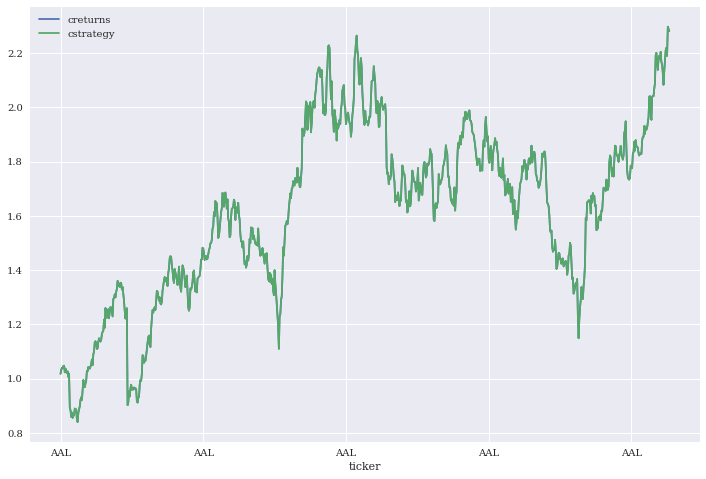

In [66]:
raw[['creturns', 'cstrategy']].loc['AAL'].plot(figsize = (12, 8));

In [53]:
raw

,date,volume,dollar_vol,dollar_vol_1m,dollar_vol_rank,rsi,bb_high,bb_low,atr,macd,...,health_care,miscellaneous,public_utilities,technology,transportation,direction,pred,strategy,creturns,cstrategy
ticker,,,,,,,,,,,,,,,,,,,,,
AAL,2013-07-25,9851.900173,482021.770518,223614.661574,91.0,69.669475,0.011251,0.140777,-0.383445,0.681257,...,0,0,0,0,1,1.0,1.0,0.017838,1.017998e+00,1.017998e+00
AAL,2013-07-26,7797.700026,386784.252060,234821.351626,83.0,72.045207,0.007052,0.146370,-0.412740,0.772848,...,0,0,0,0,1,1.0,1.0,0.013808,1.032152e+00,1.032152e+00
AAL,2013-07-29,6462.699829,322916.026692,243001.954091,78.0,73.259776,0.008843,0.146963,-0.494894,0.854980,...,0,0,0,0,1,1.0,1.0,0.007334,1.039749e+00,1.039749e+00
AAL,2013-07-30,6091.900156,303913.741002,243122.621493,79.0,72.532538,0.018500,0.142355,-0.565684,0.904814,...,0,0,0,0,1,-1.0,1.0,-0.001560,1.038128e+00,1.038128e+00
AAL,2013-07-31,9571.100178,481215.006566,256336.659780,75.0,73.926238,0.016465,0.139949,-0.653399,0.954135,...,0,0,0,0,1,1.0,1.0,0.007813,1.046270e+00,1.046270e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTS,2014-11-28,1332.156000,58600.308107,294715.115434,90.0,71.884144,0.043559,0.157493,0.397024,2.806829,...,1,0,0,0,0,1.0,1.0,0.005820,5.415392e+24,5.415392e+24
ZTS,2014-12-01,3153.115000,136973.841193,297525.671580,92.0,67.137279,0.051976,0.131103,0.403122,2.691178,...,1,0,0,0,0,-1.0,1.0,-0.012464,5.348314e+24,5.348314e+24
ZTS,2014-12-02,2500.597000,109533.781479,298272.515355,88.0,68.612084,0.041573,0.120638,0.323857,2.615256,...,1,0,0,0,0,1.0,1.0,0.008339,5.393100e+24,5.393100e+24


In [54]:
raw['trades'] = raw['pred'].diff().fillna(0).abs()

In [55]:
raw['trades'].value_counts()

0.0    109675
Name: trades, dtype: int64

In [56]:
raw

,date,volume,dollar_vol,dollar_vol_1m,dollar_vol_rank,rsi,bb_high,bb_low,atr,macd,...,miscellaneous,public_utilities,technology,transportation,direction,pred,strategy,creturns,cstrategy,trades
ticker,,,,,,,,,,,,,,,,,,,,,
AAL,2013-07-25,9851.900173,482021.770518,223614.661574,91.0,69.669475,0.011251,0.140777,-0.383445,0.681257,...,0,0,0,1,1.0,1.0,0.017838,1.017998e+00,1.017998e+00,0.0
AAL,2013-07-26,7797.700026,386784.252060,234821.351626,83.0,72.045207,0.007052,0.146370,-0.412740,0.772848,...,0,0,0,1,1.0,1.0,0.013808,1.032152e+00,1.032152e+00,0.0
AAL,2013-07-29,6462.699829,322916.026692,243001.954091,78.0,73.259776,0.008843,0.146963,-0.494894,0.854980,...,0,0,0,1,1.0,1.0,0.007334,1.039749e+00,1.039749e+00,0.0
AAL,2013-07-30,6091.900156,303913.741002,243122.621493,79.0,72.532538,0.018500,0.142355,-0.565684,0.904814,...,0,0,0,1,-1.0,1.0,-0.001560,1.038128e+00,1.038128e+00,0.0
AAL,2013-07-31,9571.100178,481215.006566,256336.659780,75.0,73.926238,0.016465,0.139949,-0.653399,0.954135,...,0,0,0,1,1.0,1.0,0.007813,1.046270e+00,1.046270e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTS,2014-11-28,1332.156000,58600.308107,294715.115434,90.0,71.884144,0.043559,0.157493,0.397024,2.806829,...,0,0,0,0,1.0,1.0,0.005820,5.415392e+24,5.415392e+24,0.0
ZTS,2014-12-01,3153.115000,136973.841193,297525.671580,92.0,67.137279,0.051976,0.131103,0.403122,2.691178,...,0,0,0,0,-1.0,1.0,-0.012464,5.348314e+24,5.348314e+24,0.0
ZTS,2014-12-02,2500.597000,109533.781479,298272.515355,88.0,68.612084,0.041573,0.120638,0.323857,2.615256,...,0,0,0,0,1.0,1.0,0.008339,5.393100e+24,5.393100e+24,0.0


From the plot above, we can see that both strategies permform in a very similar way